<a href="https://colab.research.google.com/github/nocsaren/salifort-motors/blob/main/Salifort_Motors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


best model for answering the question: what’s likely to make the employee leave the company?

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)


In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
df0 = pd.read_csv("/content/drive/MyDrive/Portfolio/Salifort Motors/HR_capstone_dataset.csv")

In [4]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df0.describe(include="all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [7]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
colnames = list(df0.columns)
colnames_new = ['satisfaction_level',
                'last_evaluation',
                'number_of_projects',
                'average_monthly_hours',
                'tenure',
                'had_work_accident',
                'has_left',
                'had_promotion',
                'department',
                'salary']
colnames_replace = {}
colnames_replace = dict(zip(colnames, colnames_new))

df = df0.copy()
df = df0.rename(columns = colnames_replace)
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,had_work_accident,has_left,had_promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
had_work_accident        0
has_left                 0
had_promotion            0
department               0
salary                   0
dtype: int64

In [10]:
df.duplicated().sum()

3008

In [15]:
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,had_work_accident,has_left,had_promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [17]:
df = df.drop_duplicates(keep = "first")
df.duplicated().sum()

0

In [18]:
df.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,had_work_accident,has_left,had_promotion
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


look for potential outliers with boxplots

<Axes: ylabel='number_of_projects'>

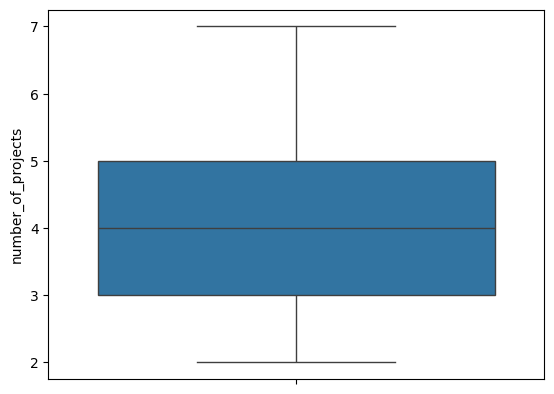

In [19]:
sns.boxplot(df["number_of_projects"])

<Axes: ylabel='average_monthly_hours'>

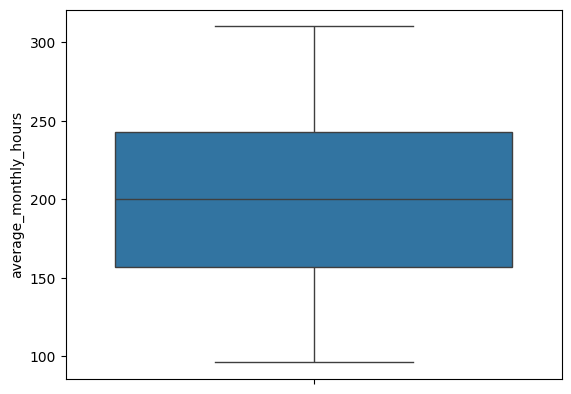

In [265]:
sns.boxplot(df["average_monthly_hours"])

<Axes: ylabel='tenure'>

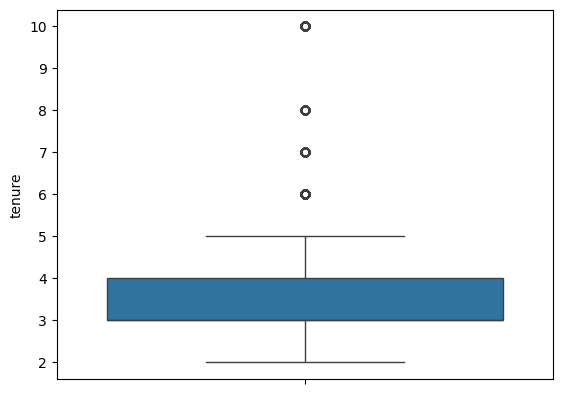

In [266]:
sns.boxplot(df["tenure"])

In [20]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = df['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [21]:
df[(np.abs(stats.zscore(df[["tenure"]])) > 3).all(axis=1)|(np.abs(stats.zscore(df[["tenure"]])) < -3).all(axis=1)].describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,had_work_accident,has_left,had_promotion
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.0,188.000000
mean,0.659521,0.723085,3.723404,196.888298,9.138298,0.250000,0.0,0.069149
std,0.215420,0.160027,0.969086,48.260581,0.993035,0.434169,0.0,0.254385
min,0.140000,0.370000,2.000000,100.000000,8.000000,0.000000,0.0,0.000000
25%,0.530000,0.607500,3.000000,154.000000,8.000000,0.000000,0.0,0.000000
50%,0.655000,0.730000,4.000000,199.500000,10.000000,0.000000,0.0,0.000000
75%,0.832500,0.860000,4.000000,240.000000,10.000000,0.250000,0.0,0.000000
max,0.990000,1.000000,6.000000,284.000000,10.000000,1.000000,0.0,1.000000


<Axes: xlabel='tenure', ylabel='Count'>

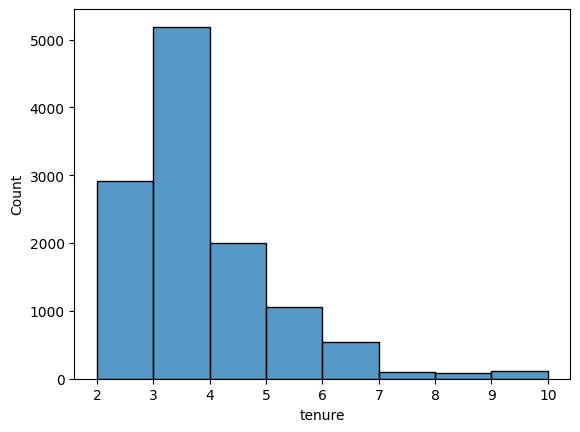

In [22]:
sns.histplot(df["tenure"], bins = 8)

In [23]:
df[(np.abs(stats.zscore(df[["tenure"]])) > 1.5).all(axis=1)|(np.abs(stats.zscore(df[["tenure"]])) < -1.5).all(axis=1)].describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,had_work_accident,has_left,had_promotion
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.598677,0.727269,4.030340,204.932039,6.830097,0.179612,0.132282,0.050971
std,0.264996,0.177934,1.126421,50.728714,1.377750,0.384097,0.339002,0.220072
min,0.120000,0.360000,2.000000,97.000000,6.000000,0.000000,0.000000,0.000000
25%,0.377500,0.580000,3.000000,163.000000,6.000000,0.000000,0.000000,0.000000
50%,0.640000,0.745000,4.000000,214.000000,6.000000,0.000000,0.000000,0.000000
75%,0.820000,0.880000,5.000000,248.000000,7.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,293.000000,10.000000,1.000000,1.000000,1.000000


In [24]:
df.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,had_work_accident,has_left,had_promotion
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


In [25]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df["has_left"].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df["has_left"].value_counts(normalize = True))

has_left
0    10000
1     1991
Name: count, dtype: int64
has_left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


In [26]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,had_work_accident,has_left,had_promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


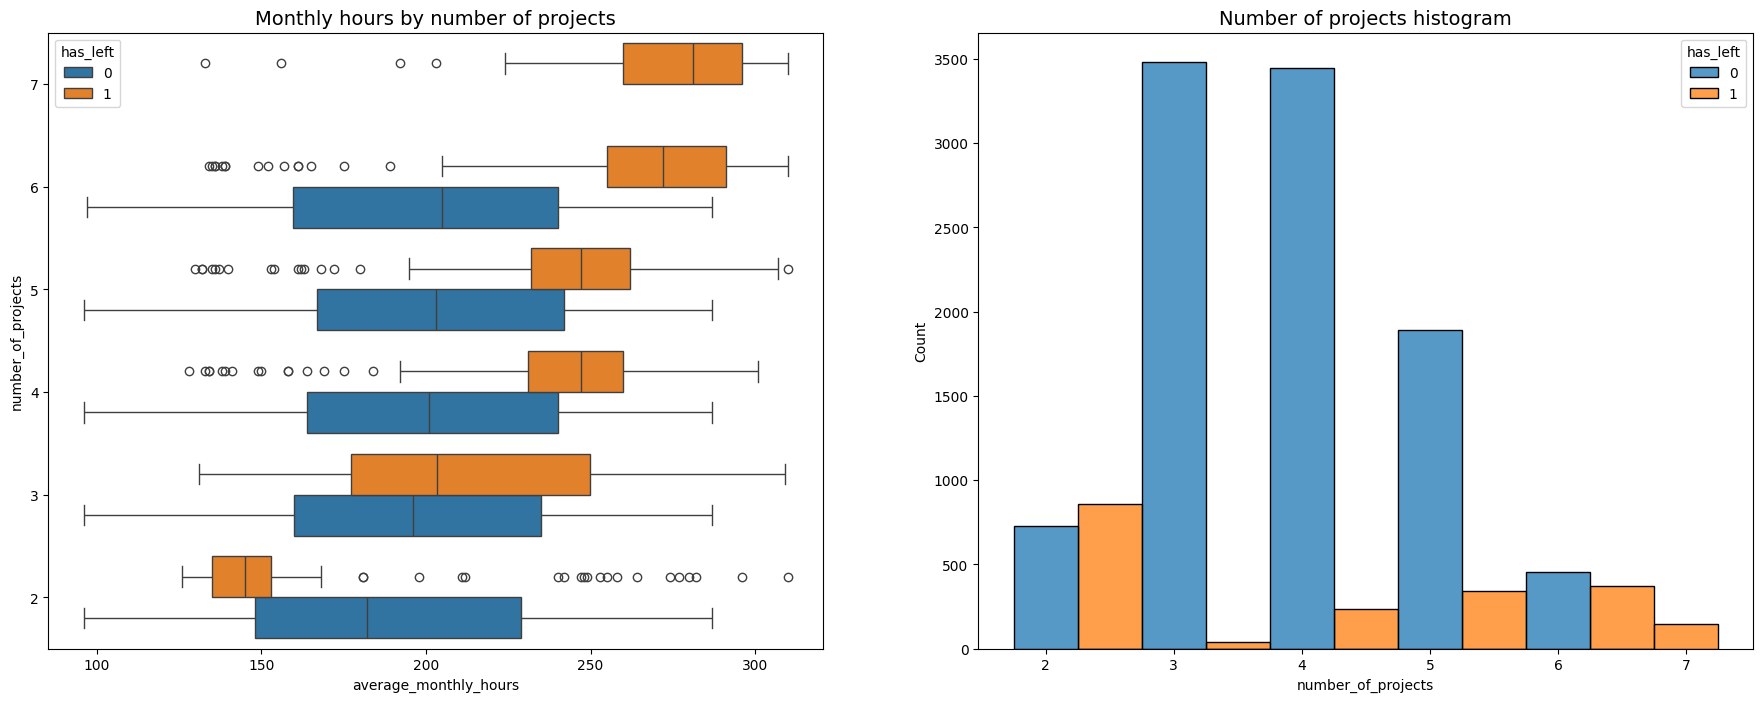

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df, x='average_monthly_hours', y='number_of_projects', hue='has_left', orient="h", ax = ax[0])
ax[0].set_title('Monthly hours by number of projects', fontsize='14')
ax[0].invert_yaxis()

sns.histplot(data=df, x='number_of_projects', hue='has_left', multiple='dodge', shrink=2, ax=ax[1], bins = 10)
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

In [28]:
# Get value counts of stayed/left for employees with 7 projects
df[df['number_of_projects']==7]['has_left'].value_counts()

has_left
1    145
Name: count, dtype: int64

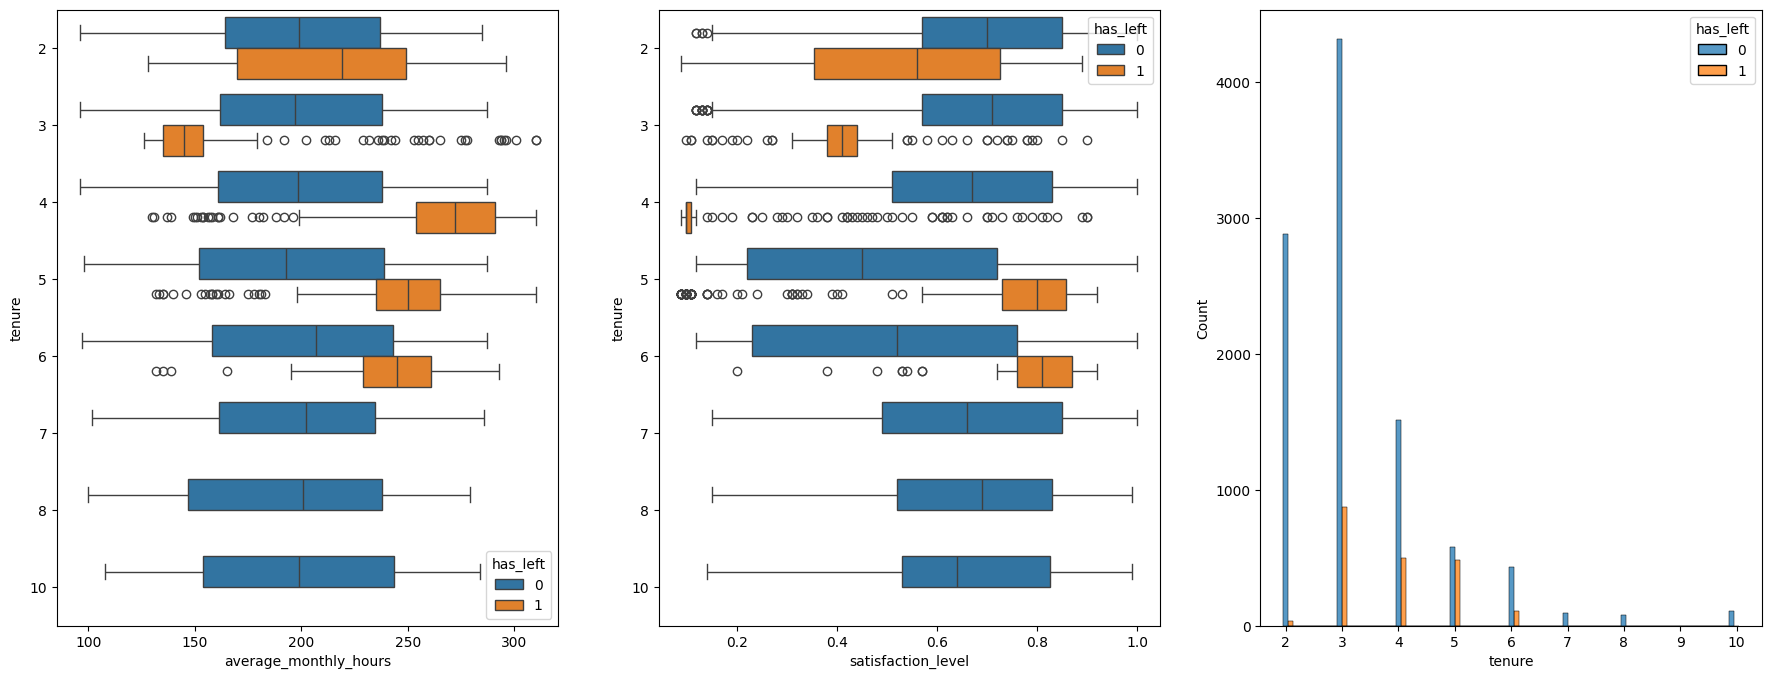

In [29]:
fig, ax = plt.subplots(1, 3, figsize = (22,8))
sns.boxplot(data=df, x='average_monthly_hours', y='tenure', hue='has_left', orient="h", ax = ax[0])
sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='has_left', orient="h", ax = ax[1])
sns.histplot(data=df, x='tenure', hue='has_left', multiple='dodge', shrink=2, ax=ax[2])
plt.show()

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [30]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby(['has_left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
has_left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, you could examine salary levels for different tenures.

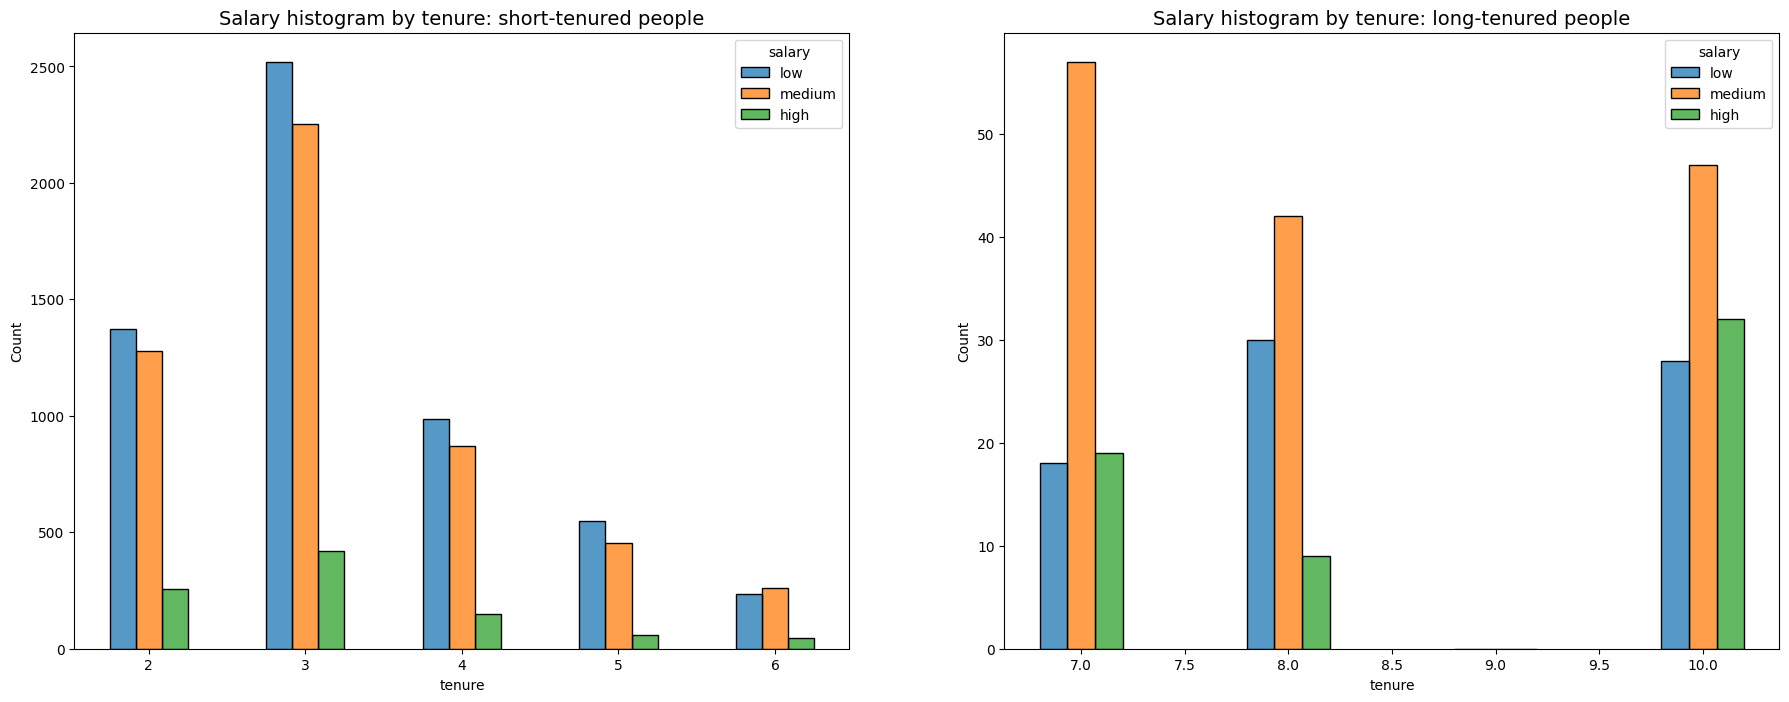

In [31]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df[df['tenure'] < 7]

# Define long-tenured employees
tenure_long = df[df['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

<Axes: xlabel='tenure', ylabel='Count'>

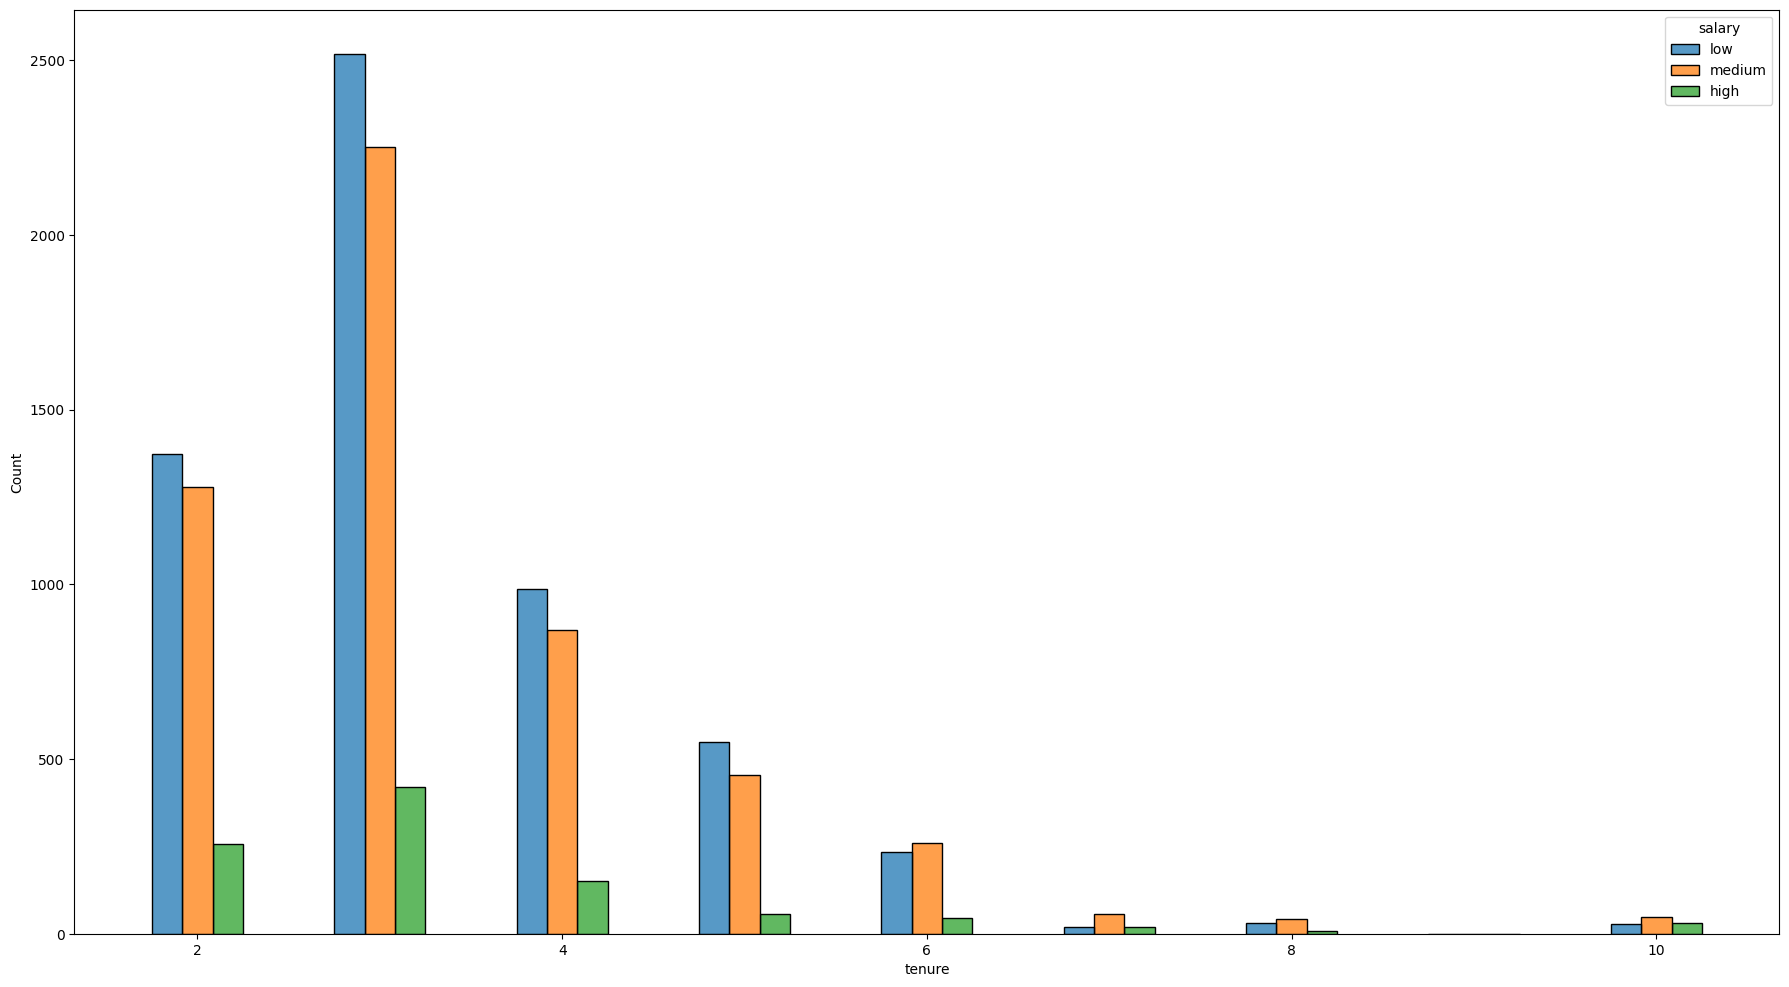

In [32]:
plt.subplots(figsize = (22,12))
sns.histplot(data=df, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5)

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

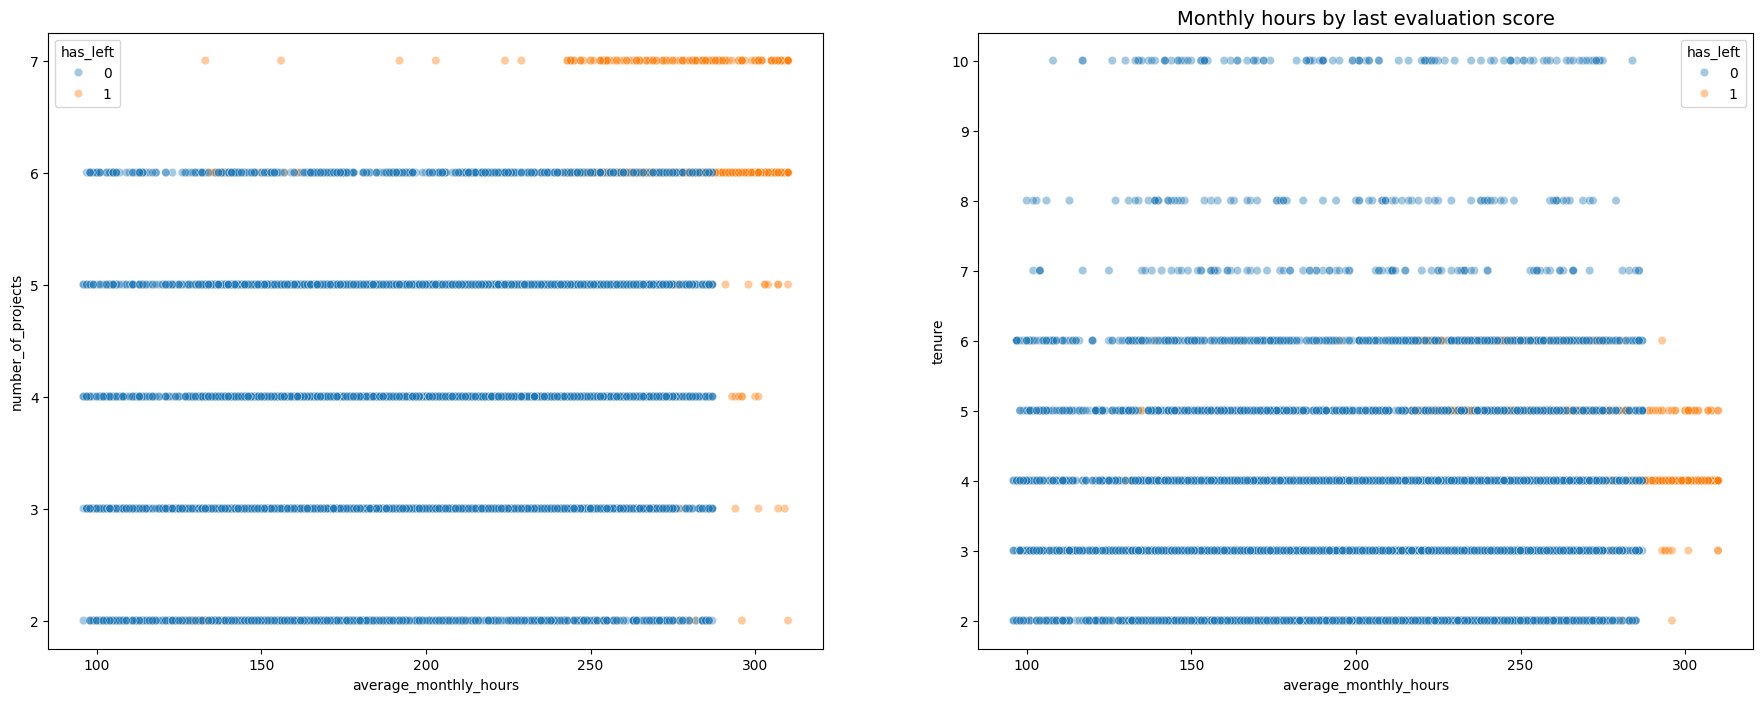

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.scatterplot(data=df, x='average_monthly_hours', y="number_of_projects", hue='has_left', alpha=0.4, ax=ax[0])
sns.scatterplot(data=df, x='average_monthly_hours', y='tenure', hue='has_left', alpha=0.4, ax = ax[1])
plt.title('Monthly hours by last evaluation score', fontsize='14');

<Axes: xlabel='average_monthly_hours', ylabel='last_evaluation'>

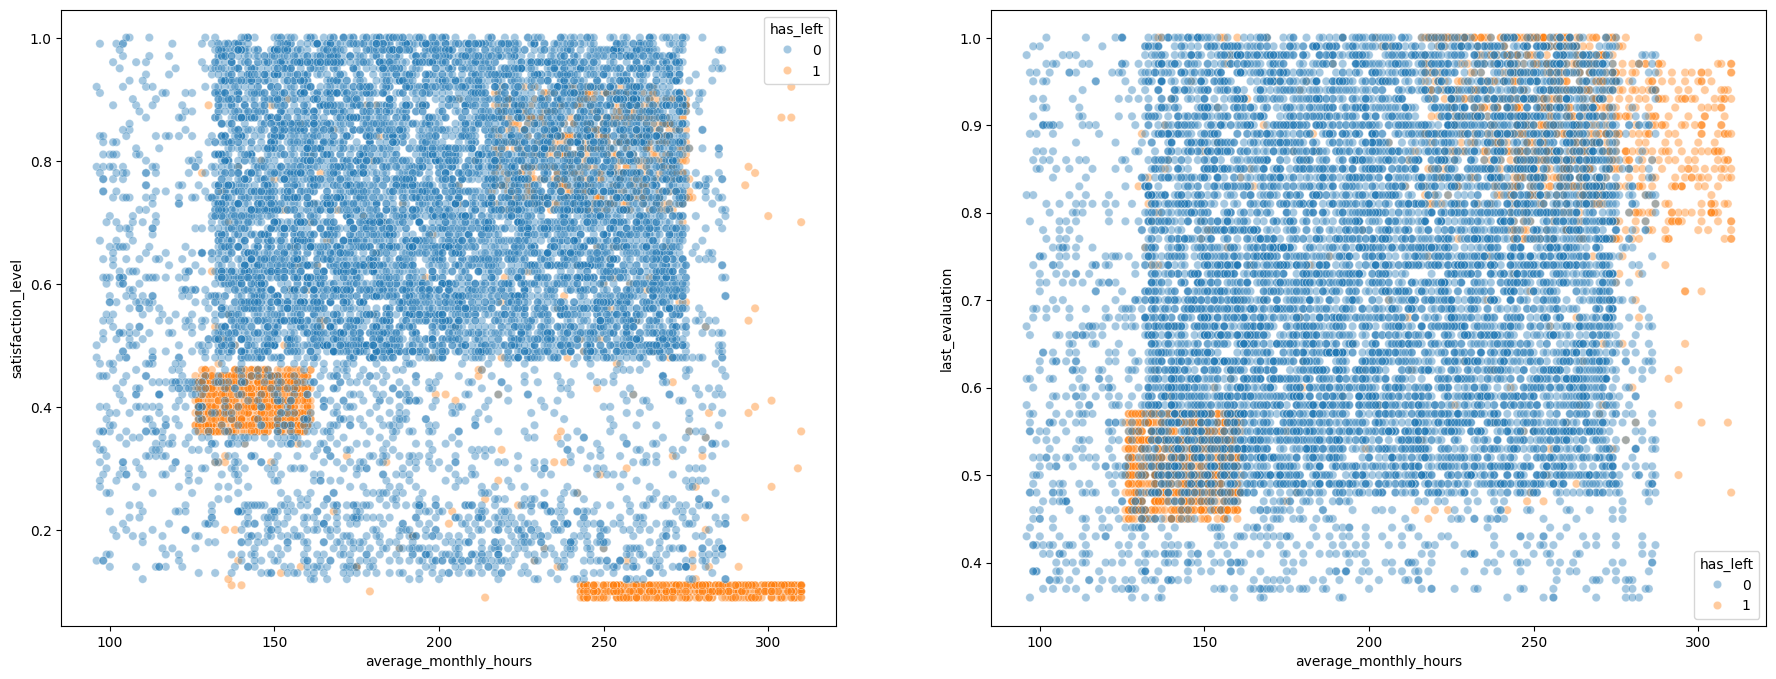

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='has_left', alpha=0.4, ax = ax[0])
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='has_left', alpha=0.4, ax = ax[1])

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
- There seems to be a correlation between hours worked and evaluation score.
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

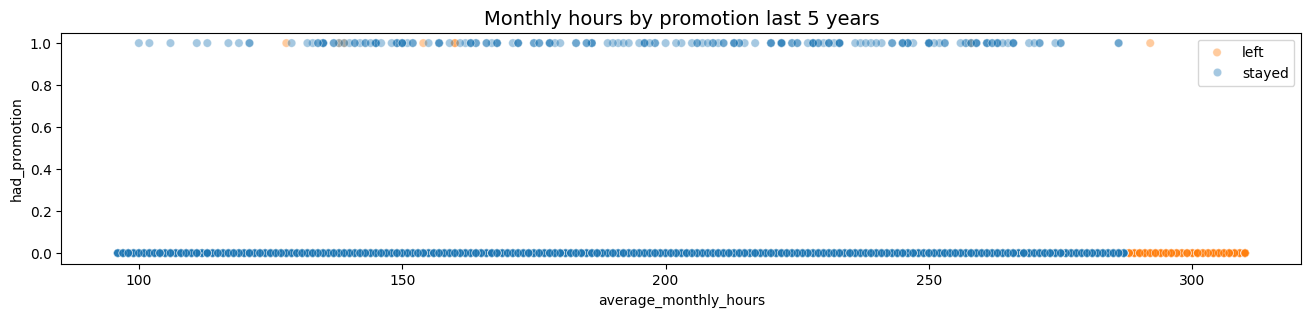

In [35]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='had_promotion', hue='has_left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, you could inspect how the employees who left are distributed across departments.

In [36]:
# Display counts for each department
df["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

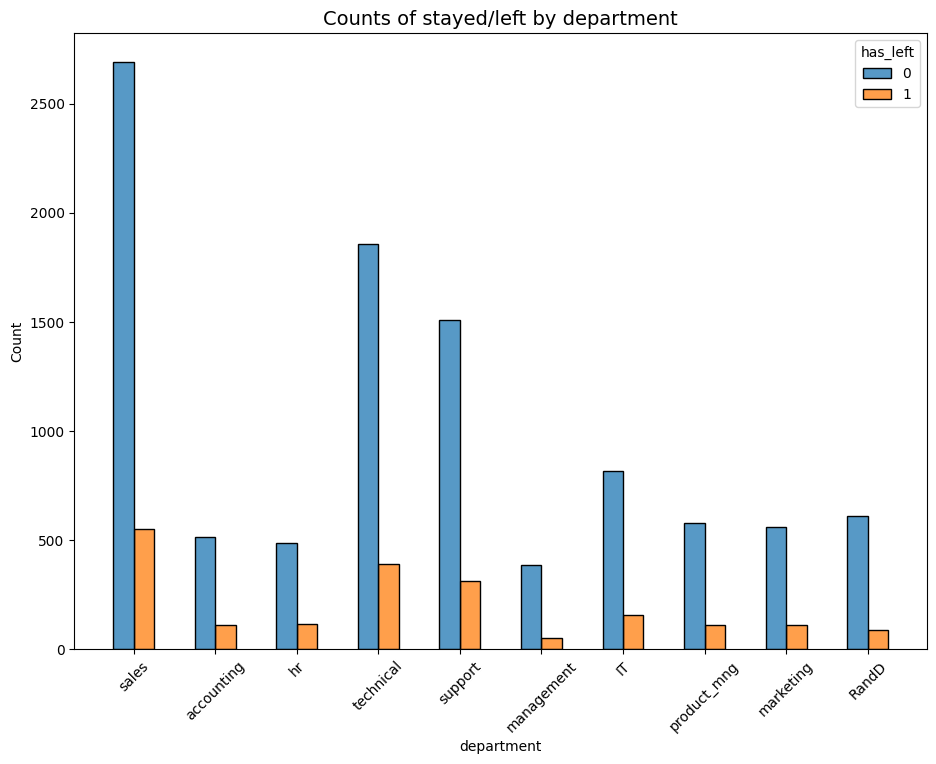

In [37]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='has_left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Lastly, you could check for strong correlations between variables in the data.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_of_projects     11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   had_work_accident      11991 non-null  int64  
 6   has_left               11991 non-null  int64  
 7   had_promotion          11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


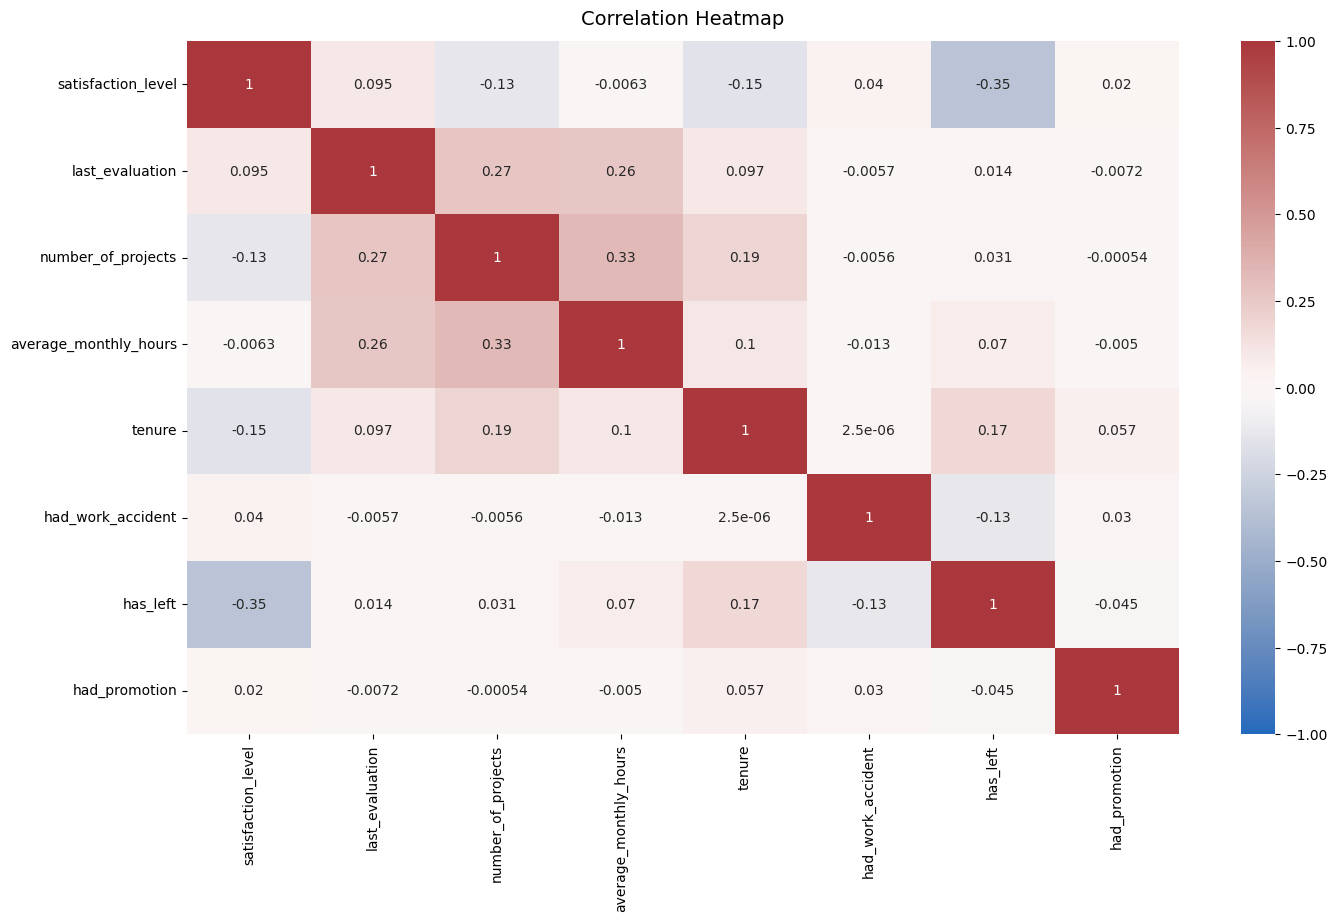

In [39]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.select_dtypes(include='number').corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data

## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model
### Identify the type of prediction task.
Your goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable you want to predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

So you could proceed with one of the two following approaches. Or, if you'd like, you could implement both and determine how they compare.

# Logistic Regression

Note that binomial logistic regression suits the task because it involves binary classification
Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`.

`department` is a categorical variable, which means you can dummy it for modeling.

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [65]:
df_encod = df.copy()

df_encod['salary'] = (
    df_encod['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)


df_encod = pd.get_dummies(df_encod, drop_first=False)


Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

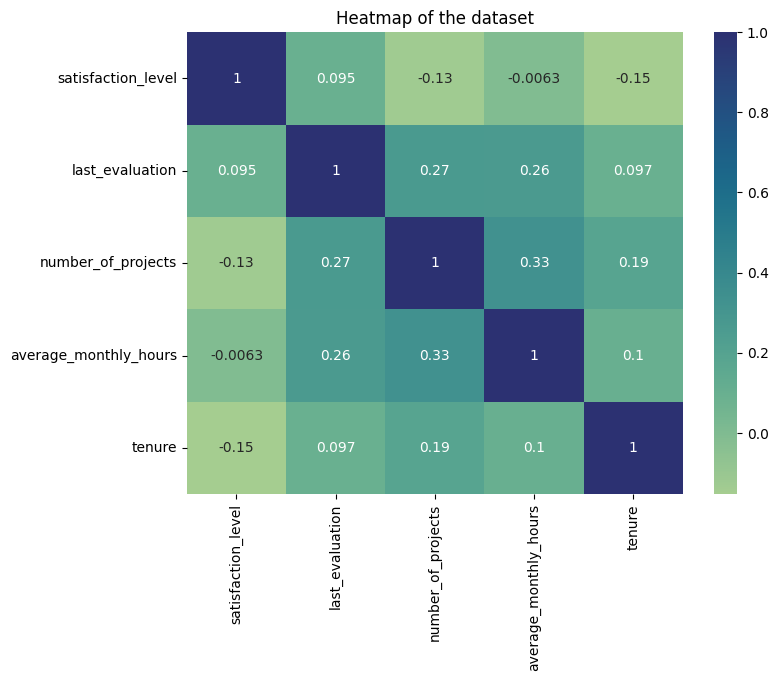

In [66]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_encod[['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Create a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't.

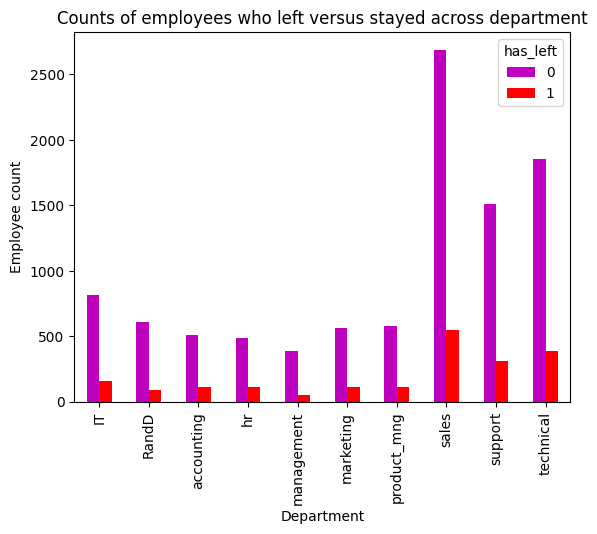

In [67]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df['department'], df['has_left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [68]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_log = df_encod[(df_encod['tenure'] >= lower_limit) & (df_encod['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_log.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,had_work_accident,has_left,had_promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Select the features you want to use in your model. Consider which variables will help you predict the outcome variable, `left`.

In [69]:
y_log = df_log["has_left"]
X_log = df_log.copy()
X_log = X_log.drop(columns = ["has_left"])

In [70]:
X_train,  X_test, y_train, y_test = train_test_split(X_log, y_log, test_size = 0.25, stratify = y_log, random_state = 42)

In [71]:
print(f"X_train:{X_train.shape[0]}, y_train: {y_train.shape[0]}, X_test: {X_test.shape[0]}, y_test: {y_test.shape[0]}")

X_train:8375, y_train: 8375, X_test: 2792, y_test: 2792


In [72]:
%%time
model=LogisticRegression(solver='liblinear')
log_clf = model.fit(X_train, y_train)

CPU times: user 36.4 ms, sys: 0 ns, total: 36.4 ms
Wall time: 38.9 ms


In [73]:
print(f"log_clf.coef_ : {log_clf.coef_}\n log_clf.intercept_ : {log_clf.intercept_}")

log_clf.coef_ : [[-4.36031114e+00 -7.55059368e-02 -4.83171655e-01  3.52788525e-03
   1.09642533e+00 -1.50193462e+00 -1.14908218e+00 -5.26861248e-01
  -1.14781919e-01 -3.41763108e-01 -3.13357693e-01 -9.37421252e-03
  -2.19858855e-01 -1.27304300e-01 -1.10496317e-01  1.11860605e-02
   1.00745428e-02  1.94050759e-03]]
 log_clf.intercept_ : [-1.2137353]


In [74]:
y_pred = log_clf.predict(X_test)

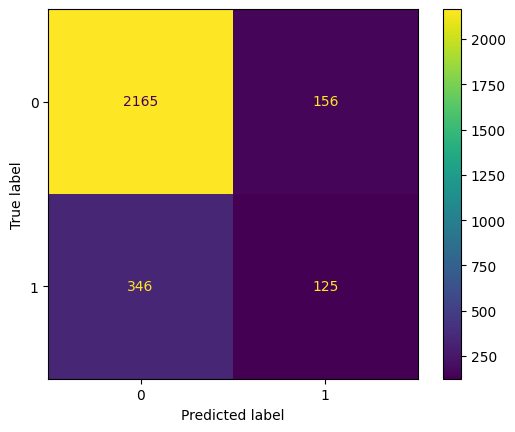

CPU times: user 380 ms, sys: 60.5 ms, total: 440 ms
Wall time: 491 ms


In [75]:
%%time
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.


In [76]:
df_log['has_left'].value_counts(normalize=True)

has_left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [77]:
# Initialize the DataFrame
model_scores = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy", "F1", "roc_auc"])

In [82]:
def get_scores(name, y_test, y_pred, model_scores):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)  # Calculate ROC AUC score
    scores_df = pd.DataFrame([[name, precision, recall, accuracy, f1, roc_auc]],
                             columns=["Model", "Precision", "Recall", "Accuracy", "F1", "roc_auc"])
    model_scores = pd.concat([model_scores, scores_df], ignore_index=True)
    return model_scores

In [84]:
model_scores = get_scores("logist", y_test, y_pred, model_scores)
print(model_scores)

    Model  Precision    Recall  Accuracy        F1  roc_auc
0  logist    0.44484  0.265393  0.820201  0.332447  0.59909


# Tree-based Model

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# This function displays the splits of the tree
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

Select the features

In [86]:
decision_tree = DecisionTreeClassifier(random_state = 42)

In [87]:
%%time
decision_tree.fit(X_train, y_train)

CPU times: user 40.5 ms, sys: 0 ns, total: 40.5 ms
Wall time: 40.4 ms


DecisionTreeClassifier(random_state=42)

In [88]:
dt_pred = decision_tree.predict(X_test)

In [89]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

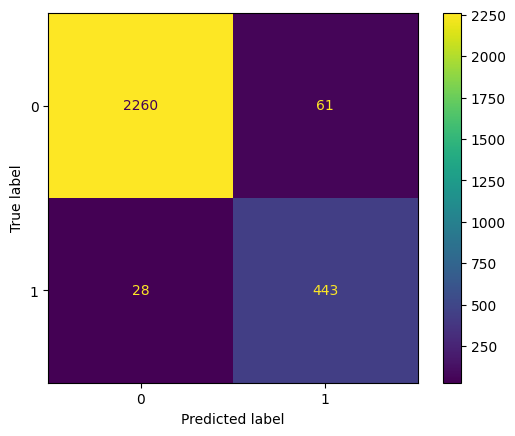

In [61]:
conf_matrix_plot(decision_tree, X_test, y_test)

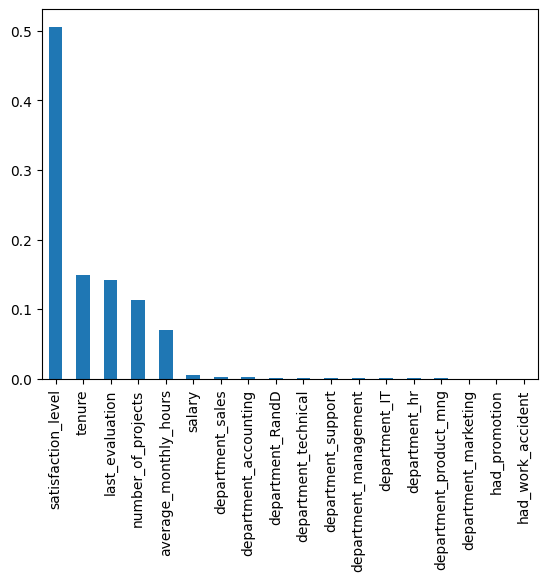

In [90]:
importances = decision_tree.feature_importances_

tree_importances = pd.Series(importances, index=X_log.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax);

In [91]:
model_scores= pd.concat([model_scores, get_scores("dtree", y_test, dt_pred, model_scores)], ignore_index=True)

In [92]:
print(model_scores)

    Model  Precision    Recall  Accuracy        F1   roc_auc
0  logist   0.444840  0.265393  0.820201  0.332447  0.599090
1  logist   0.444840  0.265393  0.820201  0.332447  0.599090
2   dtree   0.878968  0.940552  0.968123  0.908718  0.957135


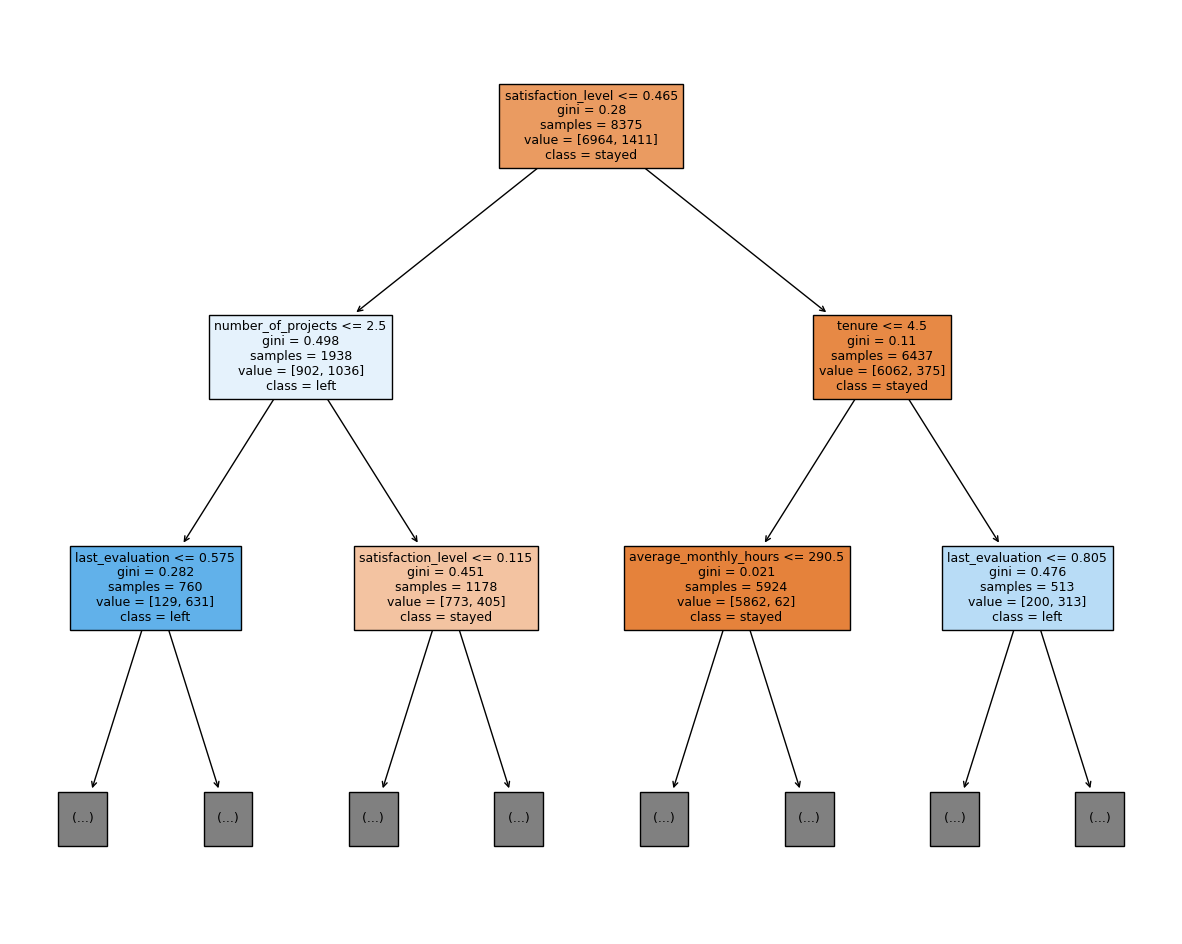

In [93]:
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=9, feature_names=X_log.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

## tree_cv

In [94]:
decision_tree = DecisionTreeClassifier(random_state = 42)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree_cv = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [95]:
%%time
tree_cv.fit(X_train, y_train) # Wall time: 4.7 s

CPU times: user 4.7 s, sys: 17.4 ms, total: 4.71 s
Wall time: 4.7 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [96]:
tree_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [97]:
tree_cv.best_score_

0.9738070859906354

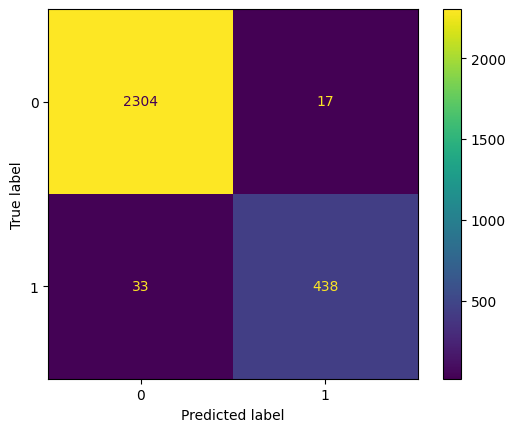

In [98]:
conf_matrix_plot(tree_cv, X_test, y_test)

In [99]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'roc_auc': [auc]
                        })

    return table

In [100]:
model_scores= pd.concat([model_scores, make_results('tree_cv', tree_cv, 'auc')], ignore_index=True)

In [101]:
print(model_scores)

     Model  Precision    Recall  Accuracy        F1   roc_auc
0   logist   0.444840  0.265393  0.820201  0.332447  0.599090
1   logist   0.444840  0.265393  0.820201  0.332447  0.599090
2    dtree   0.878968  0.940552  0.968123  0.908718  0.957135
3  tree_cv   0.959115  0.912839  0.978747  0.935275  0.973807


# Random Forest

# CV

In [102]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

# This module lets us save our models once we fit them.
import pickle

In [103]:
rf = RandomForestClassifier(random_state=42)

In [104]:
cv_params = {'max_depth': [4, 6],
             'min_samples_leaf': [1],
             'min_samples_split': [4, 8],
             'max_features': [4, 6],
             'n_estimators': [125, 250]
             }

In [105]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [106]:
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [107]:
%%time
rf_cv.fit(X_train, y_train) # Wall time: 1min 16s

CPU times: user 1min 13s, sys: 212 ms, total: 1min 14s
Wall time: 1min 16s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6], 'max_features': [4, 6],
                         'min_samples_leaf': [1], 'min_samples_split': [4, 8],
                         'n_estimators': [125, 250]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [108]:
import os
def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''
    if not os.path.exists(path):
        os.makedirs(path)
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [411]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [109]:
path = "/content/drive/MyDrive/Portfolio/Salifort Motors/model_objects/"

In [110]:
write_pickle(path, rf_cv, 'rf_cv')

In [ ]:
rf_cv = read_pickle(path, 'rf_cv')

In [111]:
rf_cv.best_params_

{'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 125}

In [112]:
rf_cv.best_score_

0.9813224622808312

In [113]:
def make_results2(model_name, model_object, X_test, y_test):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, accuracy, and ROC AUC scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Calculate ROC AUC score
    y_pred_proba = model_object.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy],
                          'roc_auc': [roc_auc]
                         }
                        )

    return table

In [114]:
model_scores = pd.concat([model_scores, make_results2("rf_cv", rf_cv, X_test, y_test)], ignore_index=True)

# Display the updated DataFrame
print(model_scores)

     Model  Precision    Recall  Accuracy        F1   roc_auc
0   logist   0.444840  0.265393  0.820201  0.332447  0.599090
1   logist   0.444840  0.265393  0.820201  0.332447  0.599090
2    dtree   0.878968  0.940552  0.968123  0.908718  0.957135
3  tree_cv   0.959115  0.912839  0.978747  0.935275  0.973807
4    rf_cv   0.977228  0.909265  0.981134  0.941928  0.988921


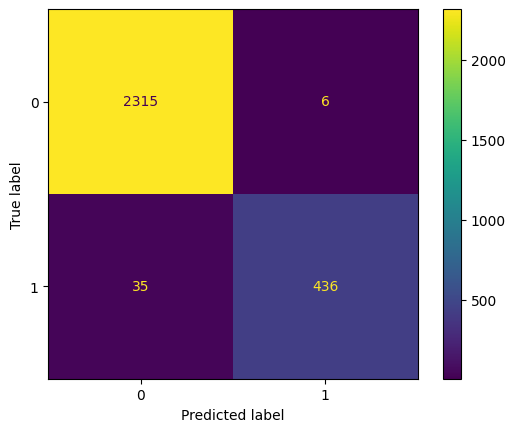

In [115]:
conf_matrix_plot(rf_cv, X_test, y_test)

# XGBOOST

In [116]:
import numpy as np
import pandas as pd

# This is the classifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import matplotlib.pyplot as plt

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# This module lets us save our models once we fit them.
import pickle

In [117]:
xgb_cls = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {'max_depth': [3, 6],
             'min_child_weight': [3, 10],
             'learning_rate': [0.1, 0.5],
             'n_estimators': [50, 125, 250]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

xgb = GridSearchCV(xgb_cls, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [118]:
%%time
xgb.fit(X_train, y_train) # Wall time: 37.7 s

CPU times: user 52 s, sys: 440 ms, total: 52.5 s
Wall time: 37.7 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [3, 6],
                         'min_child_weight': [3, 10],
                         'n_estimators': [50, 125, 250]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [119]:
model_scores = pd.concat([model_scores, make_results2("xgb", xgb, X_test, y_test)], ignore_index=True)

In [120]:
print(model_scores)

     Model  Precision    Recall  Accuracy        F1   roc_auc
0   logist   0.444840  0.265393  0.820201  0.332447  0.599090
1   logist   0.444840  0.265393  0.820201  0.332447  0.599090
2    dtree   0.878968  0.940552  0.968123  0.908718  0.957135
3  tree_cv   0.959115  0.912839  0.978747  0.935275  0.973807
4    rf_cv   0.977228  0.909265  0.981134  0.941928  0.988921
5      xgb   0.979386  0.907137  0.981134  0.941768  0.990158


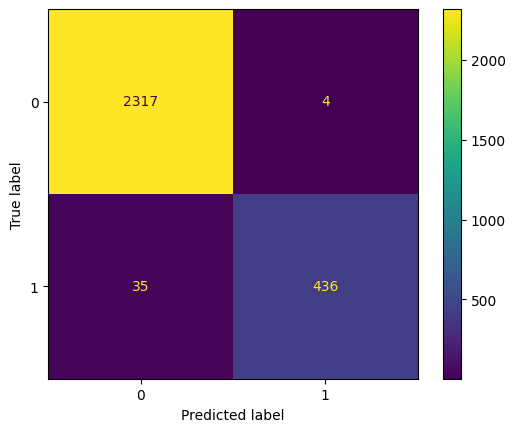

In [121]:
conf_matrix_plot(xgb, X_test, y_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

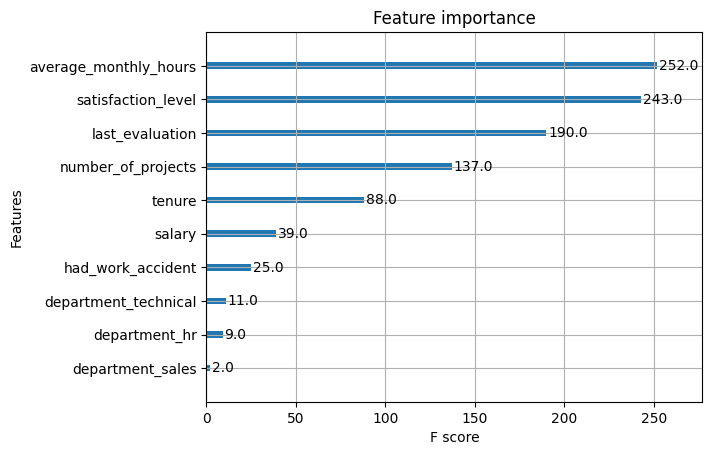

In [122]:
plot_importance(xgb.best_estimator_)

#### Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [123]:
df_fe = df.drop('satisfaction_level', axis=1)

In [124]:
df_fe['salary'] = (
    df_fe['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)


df_fe = pd.get_dummies(df_fe, drop_first=False)

In [125]:
df_fe['overworked'] = df_fe['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df_fe['overworked'].max())
print('Min hours:', df_fe['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0`

In [126]:
# Define `overworked` as working > 175 hrs/week
df_fe['overworked'] = (df_fe['overworked'] > 175).astype(int)

# Display first few rows of new column
df_fe['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [127]:
# Drop the `average_monthly_hours` column
df_fe = df_fe.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df_fe.head()

,last_evaluation,number_of_projects,tenure,had_work_accident,has_left,had_promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [128]:
# Isolate the outcome variable
y = df_fe['has_left']

# Select the features
X = df_fe.drop('has_left', axis=1)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [130]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree_fe = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [131]:
%%time
tree_fe.fit(X_train, y_train) # Wall time: 5.07 s

CPU times: user 4.76 s, sys: 16.6 ms, total: 4.78 s
Wall time: 5.07 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [132]:
tree_fe.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [133]:
tree_fe.best_score_

0.9560592158774306

This model performs very well, even without satisfaction levels and detailed hours worked data.

Next, check the other scores.

In [134]:
model_scores= pd.concat([model_scores, make_results('tree_fe', tree_fe, 'auc')], ignore_index=True)

In [135]:
print(model_scores)

     Model  Precision    Recall  Accuracy        F1   roc_auc
0   logist   0.444840  0.265393  0.820201  0.332447  0.599090
1   logist   0.444840  0.265393  0.820201  0.332447  0.599090
2    dtree   0.878968  0.940552  0.968123  0.908718  0.957135
3  tree_cv   0.959115  0.912839  0.978747  0.935275  0.973807
4    rf_cv   0.977228  0.909265  0.981134  0.941928  0.988921
5      xgb   0.979386  0.907137  0.981134  0.941768  0.990158
6  tree_fe   0.831453  0.902894  0.952851  0.864811  0.956059


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

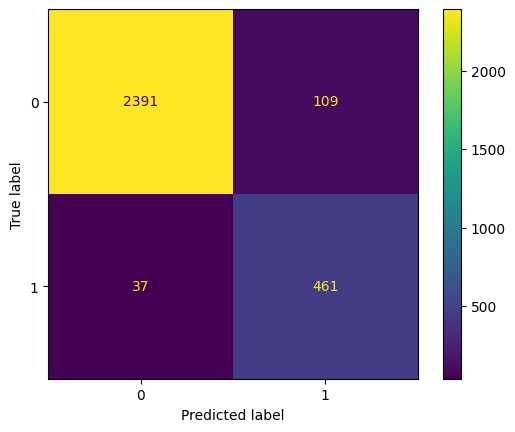

In [136]:
conf_matrix_plot(tree_fe, X_test, y_test)

#### RF with FE

In [137]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

In [138]:
cv_params = {'max_depth': [4, 6],
             'min_samples_leaf': [1],
             'min_samples_split': [4, 8],
             'max_features': [4, 6],
             'n_estimators': [125, 250]
             }

In [139]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf_fe = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [140]:
%%time
rf_fe.fit(X_train, y_train) # Wall time: 57.7 s

CPU times: user 54.7 s, sys: 185 ms, total: 54.9 s
Wall time: 55.5 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6], 'max_features': [4, 6],
                         'min_samples_leaf': [1], 'min_samples_split': [4, 8],
                         'n_estimators': [125, 250]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [141]:
rf_fe.best_params_

{'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 125}

In [142]:
rf_fe.best_score_

0.9702045466492714

In [143]:
model_scores = pd.concat([model_scores, make_results2("rf_fe", rf_fe, X_test, y_test)], ignore_index=True)

In [144]:
# Display the updated DataFrame
print(model_scores)

     Model  Precision    Recall  Accuracy        F1   roc_auc
0   logist   0.444840  0.265393  0.820201  0.332447  0.599090
1   logist   0.444840  0.265393  0.820201  0.332447  0.599090
2    dtree   0.878968  0.940552  0.968123  0.908718  0.957135
3  tree_cv   0.959115  0.912839  0.978747  0.935275  0.973807
4    rf_cv   0.977228  0.909265  0.981134  0.941928  0.988921
5      xgb   0.979386  0.907137  0.981134  0.941768  0.990158
6  tree_fe   0.831453  0.902894  0.952851  0.864811  0.956059
7    rf_fe   0.909473  0.820510  0.956633  0.862462  0.966090


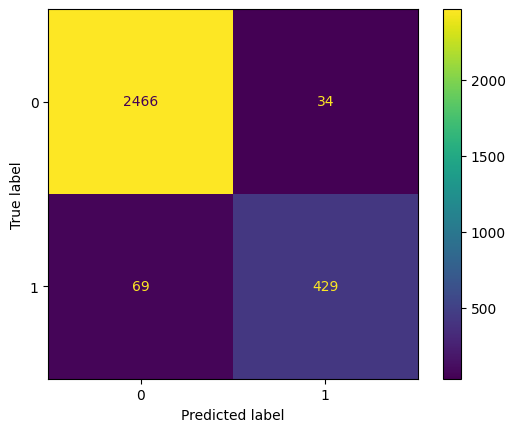

In [145]:
conf_matrix_plot(rf_fe, X_test, y_test)

#### Decision tree feature importance

You can also get feature importance from decision trees (see the [DecisionTreeClassifier scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for details).

In [146]:
#tree_fe_importances = pd.DataFrame(tree_fe.best_estimator_.feature_importances_, columns=X.columns)
tree_fe_importances = pd.DataFrame(tree_fe.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree_fe_importances = tree_fe_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree_fe_importances = tree_fe_importances[tree_fe_importances['gini_importance'] != 0]
tree_fe_importances

,gini_importance
number_of_projects,0.343930
last_evaluation,0.335089
tenure,0.213517
overworked,0.104462
salary,0.001610
department_technical,0.000630
department_sales,0.000434
department_support,0.000238
department_IT,0.000090


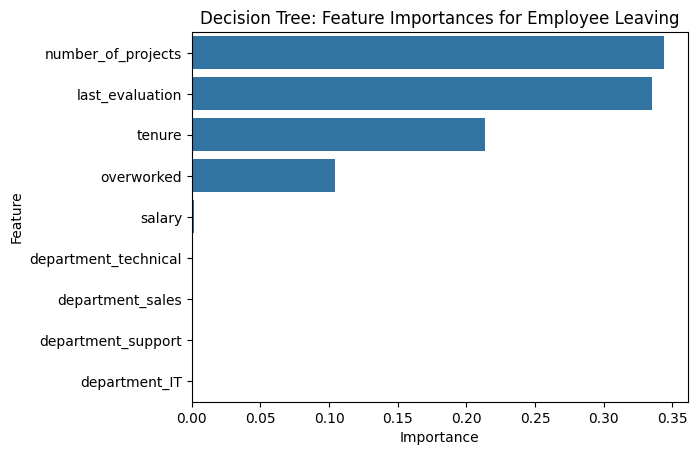

In [147]:
sns.barplot(data=tree_fe_importances, x="gini_importance", y=tree_fe_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance

Now, plot the feature importances for the random forest model.

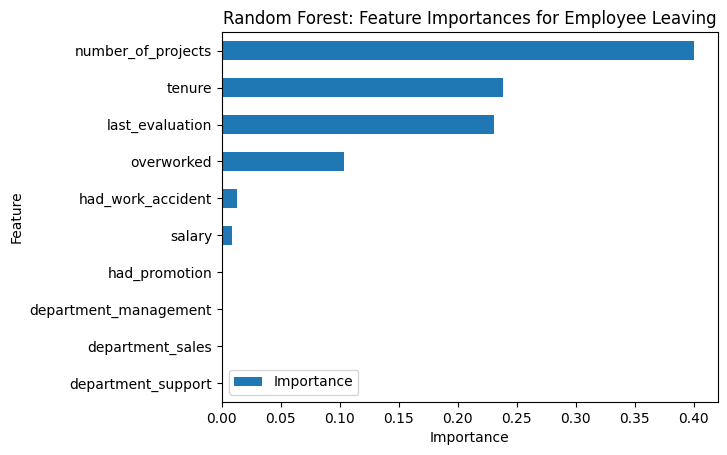

In [148]:
# Get feature importances
feat_impt = rf_fe.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_fe.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

# XGBoost FE

In [149]:
import numpy as np
import pandas as pd

# This is the classifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import matplotlib.pyplot as plt

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# This module lets us save our models once we fit them.
import pickle

In [150]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {'max_depth': [3, 6],
             'min_child_weight': [3, 10],
             'learning_rate': [0.1, 0.5],
             'n_estimators': [50, 125, 250]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

xgb_fe = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [151]:
%%time
xgb_fe.fit(X_train, y_train) # Wall time: 30.1 s

CPU times: user 46.9 s, sys: 472 ms, total: 47.4 s
Wall time: 30.1 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [3, 6],
                         'min_child_weight': [3, 10],
                         'n_estimators': [50, 125, 250]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [152]:
model_scores = pd.concat([model_scores, make_results2("xgb_fe", xgb_fe, X_test, y_test)], ignore_index=True)

In [153]:
# Display the updated DataFrame
print(model_scores)

     Model  Precision    Recall  Accuracy        F1   roc_auc
0   logist   0.444840  0.265393  0.820201  0.332447  0.599090
1   logist   0.444840  0.265393  0.820201  0.332447  0.599090
2    dtree   0.878968  0.940552  0.968123  0.908718  0.957135
3  tree_cv   0.959115  0.912839  0.978747  0.935275  0.973807
4    rf_cv   0.977228  0.909265  0.981134  0.941928  0.988921
5      xgb   0.979386  0.907137  0.981134  0.941768  0.990158
6  tree_fe   0.831453  0.902894  0.952851  0.864811  0.956059
7    rf_fe   0.909473  0.820510  0.956633  0.862462  0.966090
8   xgb_fe   0.903613  0.884799  0.965195  0.894086  0.967813


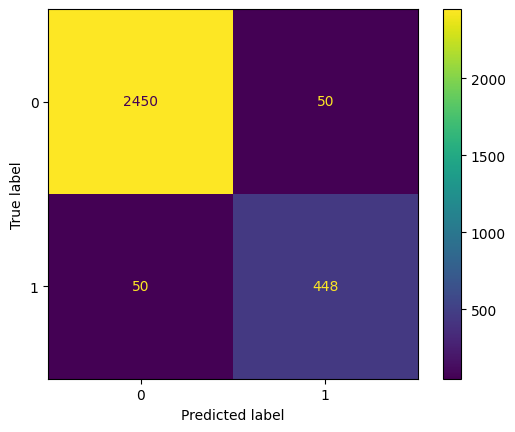

In [154]:
conf_matrix_plot(xgb_fe, X_test, y_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

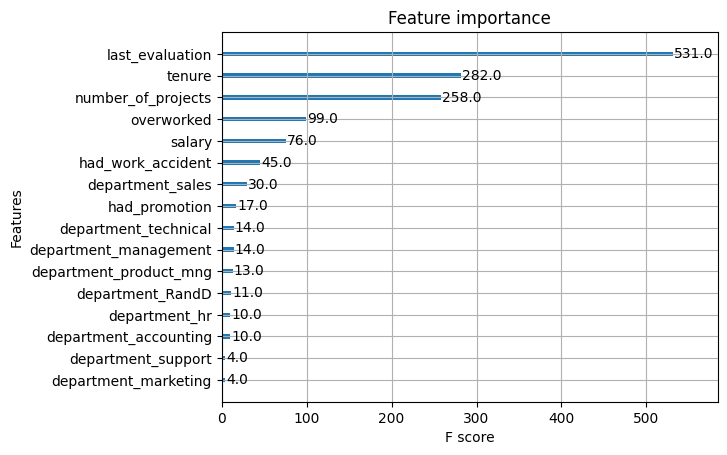

In [155]:
plot_importance(xgb_fe.best_estimator_)

# Evaluation

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?






### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.